# Telco Churn Project

## Carl Griffin

### June 2021

## Goals

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pydataset as data

from env import host, username, password
from prepare import prep_telco_data, telco_split
from acquire import get_telco_data

In [2]:
# Acquire the data
telco_df = get_telco_data()

In [3]:
# Make sure the data has been acquired
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [4]:
# Get the data types
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [11]:
#use nunique to look at the obj data types
telco_df.nunique()

payment_type_id                4
internet_service_type_id       3
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
internet_service_type          3
payment_type                   4
dtype: int64

In [12]:
# Transpose the data for a different perspective
telco_df.head().T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


In [13]:
# Prepare the data
telco_df = prep_telco_data(telco_df)

In [14]:
# Take a look at what gets returned.
telco_df.info

<bound method DataFrame.info of              payment_type_id  internet_service_type_id  contract_type_id  \
customer_id                                                                
0016-QLJIS                 2                         1                 3   
0017-DINOC                 4                         1                 3   
0019-GFNTW                 3                         1                 3   
0056-EPFBG                 4                         1                 3   
0078-XZMHT                 3                         1                 3   
...                      ...                       ...               ...   
9962-BFPDU                 2                         3                 1   
9967-ATRFS                 2                         3                 1   
9970-QBCDA                 4                         3                 1   
9975-SKRNR                 2                         3                 1   
9986-BONCE                 3                         3  

In [15]:
# Transpose again
telco_df.head().T

customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
gender,0,1,0,1,1
senior_citizen,0,0,0,0,0
partner,1,0,0,1,1
dependents,1,0,0,1,0
tenure,65,54,56,20,72
phone_service,1,0,0,0,1
multiple_lines,1,0,0,0,1


([<matplotlib.axis.XTick at 0x7fc148f9b250>,
 [Text(0, 0, ''), Text(0, 0, '')])

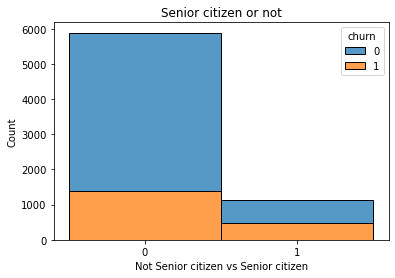

In [17]:
# Make a plot distinguishing between Senior citizens and Non-senior citizens, churn vs. no churn
sns.histplot(telco_df,
             x=telco_df.senior_citizen,
             hue='churn',
             multiple='stack',
             discrete=True)

plt.title("Senior citizen or not")
plt.xlabel('Not Senior citizen vs Senior citizen')

#plt.xlim(0, telco_df.senior_citizen.max());
plt.xticks(np.arange(telco_df.senior_citizen.min(), telco_df.senior_citizen.max()+1, 1.0))

(18.25, 118.75)

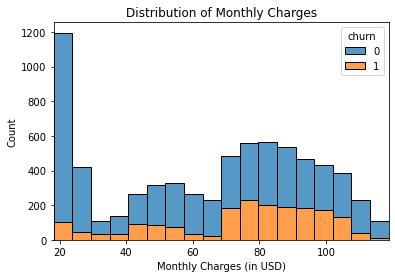

In [18]:
# Make a plot showing monthly charge breakpoints resulting in churn
sns.histplot(data=telco_df,
            x=telco_df.monthly_charges,
            hue=telco_df.churn,
            multiple='stack')

plt.title("Distribution of Monthly Charges")
plt.xlabel('Monthly Charges (in USD)')

plt.xlim(telco_df.monthly_charges.min(),
         telco_df.monthly_charges.max())

# plt.xticks(np.linspace(18, 120, 24));

In [25]:
# Create a new data frame dropping payment_type_id, internet_service_type and contract_type_id
telco_df2 = telco_df.drop(columns=['payment_type_id', 'internet_service_type', 'contract_type_id'])

In [26]:
telco_df2.info

<bound method DataFrame.info of              internet_service_type_id  gender  senior_citizen  partner  \
customer_id                                                              
0016-QLJIS                          1       0               0        1   
0017-DINOC                          1       1               0        0   
0019-GFNTW                          1       0               0        0   
0056-EPFBG                          1       1               0        1   
0078-XZMHT                          1       1               0        1   
...                               ...     ...             ...      ...   
9962-BFPDU                          3       0               0        1   
9967-ATRFS                          3       0               0        0   
9970-QBCDA                          3       0               0        0   
9975-SKRNR                          3       1               0        0   
9986-BONCE                          3       0               0        0   

     

In [27]:
# split the data
train, validate, test = telco_split(telco_df2)


In [28]:
train.shape

(3937, 18)

In [29]:
train

,internet_service_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,online services,streaming_services
customer_id,,,,,,,,,,,,,,,,,,
8966-SNIZF,3,0,0,1,0,70,1,0,0,0,0,19.45,1303.50,0,2,1,0,0
3466-BYAVD,1,1,0,1,1,15,1,0,1,1,1,69.50,1071.40,0,0,0,1,1
9278-VZKCD,2,0,1,1,0,52,1,1,1,0,1,109.10,5647.95,0,0,0,2,2
7074-STDCN,1,1,0,0,0,39,0,0,0,1,1,40.60,1494.50,0,0,0,0,1
5914-GXMDA,3,0,0,1,0,32,1,0,0,0,0,19.30,593.20,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5117-ZSMHQ,1,0,0,1,1,71,1,1,1,1,0,89.90,6342.70,0,2,1,2,2
3755-JBMNH,2,1,1,1,0,16,1,0,0,0,1,71.80,1167.80,1,0,1,0,0
2896-TBNBE,2,1,0,1,0,40,1,0,1,0,0,80.80,3132.75,0,1,0,1,0


In [30]:
# Create the values dropping churn vs churn
X_train, y_train = train.drop(columns='churn'), train['churn']
X_validate, y_validate = validate.drop(columns='churn'), validate['churn']
X_test, y_test = test.drop(columns='churn'), test['churn']

In [31]:

train.churn.value_counts(), train.churn.value_counts(normalize=True)

(0    2891
 1    1046
 Name: churn, dtype: int64,
 0    0.734315
 1    0.265685
 Name: churn, dtype: float64)

In [32]:
# Set up the baseline and get the baseline accuracy
baseline = DummyClassifier(strategy='constant', constant=0)
baseline.fit(X_train, y_train)
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.7343


In [33]:
# See how Decision Tree stacks up without a MaxDepth
dt1 = DecisionTreeClassifier(random_state=123)
dt1.fit(X_train, y_train)
dt1.score(X_train,y_train)

0.9977139954279909

In [34]:
# A little loop to see what would be the best MaxDepth
for m in range(1, 10):
    dt = DecisionTreeClassifier(max_depth=m, random_state=123)
    dt.fit(X_train, y_train)
    print(f'Model: {m} when m is {m}')
    print(f'training score: {dt.score(X_train, y_train):.2%}')
    print(f'validate score: {dt.score(X_validate, y_validate):.2%}')
    print('__________________________________________________________')

Model: 1 when m is 1
training score: 73.43%
validate score: 73.40%
__________________________________________________________
Model: 2 when m is 2
training score: 75.82%
validate score: 73.93%
__________________________________________________________
Model: 3 when m is 3
training score: 78.74%
validate score: 78.50%
__________________________________________________________
Model: 4 when m is 4
training score: 79.10%
validate score: 78.44%
__________________________________________________________
Model: 5 when m is 5
training score: 79.88%
validate score: 77.61%
__________________________________________________________
Model: 6 when m is 6
training score: 81.61%
validate score: 76.90%
__________________________________________________________
Model: 7 when m is 7
training score: 83.16%
validate score: 76.07%
__________________________________________________________
Model: 8 when m is 8
training score: 84.81%
validate score: 75.53%
___________________________________________________

In [35]:
# The best MaxDepth from above turns out to be 6
dt1 = DecisionTreeClassifier(max_depth=6, random_state=123)
dt1.fit(X_train, y_train)
dt1.score(X_train,y_train)

0.8161036322072645

In [100]:
y_pred = dt1.predict(X_train)

In [101]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2891
           1       0.67      0.60      0.63      1046

    accuracy                           0.82      3937
   macro avg       0.77      0.75      0.75      3937
weighted avg       0.81      0.82      0.81      3937



In [39]:
# Had to bump up max_iter due to warning message with max_iter set to default 100.
logit = LogisticRegression(max_iter=200)

In [40]:
logit.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [41]:
y_pred = logit.predict(X_train)

In [42]:
print('\nAccuracy of logit classifier on training set:',logit.score(X_train, y_train))


Accuracy of logit classifier on training set: 0.8034036068072136


In [43]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2891
           1       0.66      0.55      0.60      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.72      0.73      3937
weighted avg       0.80      0.80      0.80      3937



In [44]:
# Correlate the data to see what values are most likely to result to churn
corr_df = train.corr()

In [45]:
corr_df.sort_values(by='churn').T


,contract_type,tenure,total_charges,payment_type,tech_support,dependents,online services,partner,device_protection,internet_service_type_id,phone_service,gender,multiple_lines,streaming_services,senior_citizen,monthly_charges,paperless_billing,churn
internet_service_type_id,0.090193,-0.041151,-0.179815,-0.033393,-0.387590,0.047865,-0.441447,0.002295,-0.309099,1.000000,0.389138,-0.013853,0.029989,-0.282850,-0.048237,-0.325424,-0.151548,-0.054107
gender,-0.016134,0.007683,0.000279,-0.016551,-0.003042,-0.001645,-0.003503,-0.001221,-0.016430,-0.013853,-0.027566,1.000000,-0.004093,-0.008003,-0.001378,-0.009844,-0.002305,0.005866
senior_citizen,-0.139793,0.016071,0.094484,-0.034754,-0.061434,-0.212460,0.035094,0.019339,0.055236,-0.048237,0.004428,-0.001378,0.140615,0.132223,1.000000,0.220475,0.165636,0.167749
partner,0.310281,0.390546,0.313955,0.159551,0.126241,0.456445,0.181627,1.000000,0.158869,0.002295,0.003623,-0.001221,0.128751,0.139956,0.019339,0.087960,-0.025318,-0.148287
dependents,0.246930,0.169495,0.065545,0.118267,0.057214,1.000000,0.077319,0.456445,0.026943,0.047865,0.001674,-0.001645,-0.026156,-0.035043,-0.212460,-0.107817,-0.133115,-0.165528
tenure,0.679196,1.000000,0.827061,0.399268,0.338505,0.169495,0.449244,0.390546,0.376768,-0.041151,-0.000353,0.007683,0.330175,0.338675,0.016071,0.260740,0.017345,-0.340800
phone_service,0.008218,-0.000353,0.109057,0.012428,-0.088467,0.001674,-0.075187,0.003623,-0.082817,0.389138,1.000000,-0.027566,0.280078,-0.049443,0.004428,0.242779,-0.004963,-0.003177
multiple_lines,0.117470,0.330175,0.463428,0.112550,0.096158,-0.026156,0.199377,0.128751,0.198337,0.029989,0.280078,-0.004093,1.000000,0.298778,0.140615,0.491332,0.154765,0.038191
device_protection,0.228818,0.376768,0.532050,0.168658,0.342703,0.026943,0.384970,0.158869,1.000000,-0.309099,-0.082817,-0.016430,0.198337,0.450882,0.055236,0.480597,0.113547,-0.068500
tech_support,0.309558,0.338505,0.446848,0.173991,1.000000,0.057214,0.393967,0.126241,0.342703,-0.387590,-0.088467,-0.003042,0.096158,0.323808,-0.061434,0.346436,0.045882,-0.169062


## Takeaway

highest churn rate, positive and negative: 

contract_type - negative, 

tenure - negative, 

tech_support - negative

online_services - negative

senior_citizen - positive

paperless_billing - positive, 

monthly_charges - positive

In [51]:
# Write a loop to determine the best number of neighbors to use
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Model: {k} when k is {k}')
    print(f'training score: {knn.score(X_train, y_train):.2%}')
    print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
    print('__________________________________________________________')

Model: 1 when k is 1
training score: 99.77%
validate score: 71.09%
__________________________________________________________
Model: 2 when k is 2
training score: 85.65%
validate score: 76.01%
__________________________________________________________
Model: 3 when k is 3
training score: 85.85%
validate score: 74.53%
__________________________________________________________
Model: 4 when k is 4
training score: 82.63%
validate score: 76.95%
__________________________________________________________
Model: 5 when k is 5
training score: 82.27%
validate score: 76.90%
__________________________________________________________
Model: 6 when k is 6
training score: 81.92%
validate score: 76.48%
__________________________________________________________
Model: 7 when k is 7
training score: 81.64%
validate score: 76.78%
__________________________________________________________
Model: 8 when k is 8
training score: 80.49%
validate score: 77.49%
___________________________________________________

In [53]:
# 10 is the best value from the results above
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [54]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
y_pred = knn.predict(X_train)

In [56]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88      2891
           1       0.75      0.40      0.52      1046

    accuracy                           0.80      3937
   macro avg       0.78      0.68      0.70      3937
weighted avg       0.80      0.80      0.78      3937



In [57]:
print('\nAccuracy of knn classifier on training set:',knn.score(X_train, y_train))


Accuracy of knn classifier on training set: 0.8041656083312166


In [58]:
X_train.head().T


customer_id,8966-SNIZF,3466-BYAVD,9278-VZKCD,7074-STDCN,5914-GXMDA
internet_service_type_id,3.00,1.0,2.00,1.0,3.0
gender,0.00,1.0,0.00,1.0,0.0
senior_citizen,0.00,0.0,1.00,0.0,0.0
partner,1.00,1.0,1.00,0.0,1.0
dependents,0.00,1.0,0.00,0.0,0.0
tenure,70.00,15.0,52.00,39.0,32.0
phone_service,1.00,1.0,1.00,0.0,1.0
multiple_lines,0.00,0.0,1.00,0.0,0.0
device_protection,0.00,1.0,1.00,0.0,0.0
tech_support,0.00,1.0,0.00,1.0,0.0


## First hypothesis

Is customer churn independent of whether they have a month-to-month contract or other types of contracts?

\$H_{O}$ Churn is independent of whether they have a month-to-month contract or other types of contracts.

\$H_{a}$ Churn is dependent on whether they have a month-to-month contract or other types of contracts.

In [59]:
# Break out the contract type from month-to-month to yearly to bi-annually.
type_of_contract = np.where((X_train['contract_type']==0), 1, 0)

In [60]:
result1 = pd.crosstab(type_of_contract, y_train)
result1 = result1.rename(index={0:'Year/Year +', 1: 'Month-to-Month'}, columns={0:'No Churn', 1:'Churn'})
result1.index.name=''
result1.columns.name=''

In [61]:
result1

,No Churn,Churn
,,
Year/Year +,1682,120
Month-to-Month,1209,926


In [62]:
alpha = 0.05

In [63]:
chi2, p, degf, expected = stats.chi2_contingency(result1)

print(("chi2: {:.2f}\np: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))


chi2: 673.24
p: 0.00
alpha: 0.05



In [64]:
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

 p is less than our alpha and we can reject the null hypothesis


## Second hypothesis

Is customer churn independent of whether they are a senior citizen or not?

\$H_{O}$ Churn is independent of whether they are a senior citizen or not.

\$H_{a}$ Churn is dependent on whether they are a senior citizen or not.

In [65]:
senior = np.where((X_train.senior_citizen==0), 1, 0)

In [68]:
result2 = pd.crosstab(senior, y_train)
result2 = result2.rename(index={0:'Senior', 1: 'Not Senior'}, columns={0:'No Churn', 1:'Churn'})
result2.index.name=''
result2.columns.name=''

In [69]:
result2

,No Churn,Churn
,,
Senior,367,280
Not Senior,2524,766


In [70]:
chi2, p, degf, expected = stats.chi2_contingency(result2)

print(("chi2: {:.2f}\np: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))


chi2: 109.76
p: 0.00
alpha: 0.05



In [71]:
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

 p is less than our alpha and we can reject the null hypothesis


### Putting them all together to see which model would be the best

In [72]:
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))
print('')
print('Training set accuracies:')
print('---------------------------')
print('Logisitic Regression accuracy: %.4f' % logit.score(X_train, y_train))
print('Decision Tree accuracy: %.4f' % dt1.score(X_train, y_train))
print('KNN accuracy: %.4f' % knn.score(X_train, y_train))

Baseline accuracy: 0.7343

Training set accuracies:
---------------------------
Logisitic Regression accuracy: 0.8034
Decision Tree accuracy: 0.8161
KNN accuracy: 0.8042


In [73]:
print('Validation set accuracies:')
print('---------------------------')
print('Logisitic Regression accuracy: %.4f' % logit.score(X_validate, y_validate))
print('Decision Tree accuracy: %.4f' % dt1.score(X_validate, y_validate))
print('KNN accuracy: %.4f' % knn.score(X_validate, y_validate))

Validation set accuracies:
---------------------------
Logisitic Regression accuracy: 0.7938
Decision Tree accuracy: 0.7690
KNN accuracy: 0.7778


Takeaway - Logistic Regression has the lower train percentage, but the highest validation percentage making the two percentages closest together resulting in the best model to use.

In [74]:
# Using the highest 4 correlating features:
test_feat = ['contract_type', 'tenure', 'paperless_billing', 'monthly_charges']
logit = LogisticRegression()
logit.fit(X_train[test_feat], y_train)

LogisticRegression()

In [75]:
print('\nAccuracy of logit classifier on training set:',logit.score(X_train[test_feat], y_train))


Accuracy of logit classifier on training set: 0.7858775717551435


In [76]:
# Using the highest 6 correlating features for comparison:
test_feat2 = ['contract_type', 'tenure', 'tech_support', 'senior_citizen', 'paperless_billing', 'monthly_charges']
logit2 = LogisticRegression()
logit2.fit(X_train[test_feat2], y_train)

LogisticRegression()

In [77]:
print('\nAccuracy of logit2 classifier on training set:',logit2.score(X_train[test_feat2], y_train))


Accuracy of logit2 classifier on training set: 0.7962915925831852


Using 6 features vs 4 features results in a better fit.

In [78]:
print('\nAccuracy of logit2 classifier on training set:',logit2.score(X_train[test_feat2], y_train))
print('Accuracy of logit2 classifier on validation set:',logit2.score(X_validate[test_feat2], y_validate))
print('Accuracy of logit2 classifier on test set:',logit2.score(X_test[test_feat2], y_test))


Accuracy of logit2 classifier on training set: 0.7962915925831852
Accuracy of logit2 classifier on validation set: 0.7885071090047393
Accuracy of logit2 classifier on test set: 0.798862828713575


In [105]:
# Create a temporary dataframe using the 6 top features and calculate the prediction
temp_df = telco_df[['contract_type', 'tenure', 'tech_support', 'senior_citizen', 'paperless_billing', 'monthly_charges']]

# temp_df needs to have the same columns as the X_train that was used to fit the model

telco_df['prediction'] = logit2.predict(temp_df)

In [106]:
# Calculate the probability of churn
df_prob = pd.DataFrame(logit2.predict_proba(temp_df))
df_prob = df_prob.drop(0,axis=1)


In [107]:
df_prob.head()

,1
0,0.032565
1,0.009708
2,0.009071
3,0.038226
4,0.022942


In [93]:
# Reset the index (customer_id) so the customer_id can be used to create the csv file.
telco_df.reset_index(inplace=True)

In [94]:
# Store the data values
customer_id = telco_df['customer_id']
prediction = telco_df['prediction']

In [95]:
# Create the final dataframe for the csv file.
data = [customer_id, df_prob, prediction]

csv_data = pd.concat(data, axis=1)
csv_data = csv_data.rename(columns={1:'prob_of_churn'})

In [96]:
# Display the data 
csv_data

,customer_id,prob_of_churn,prediction
0,0016-QLJIS,0.032565,0
1,0017-DINOC,0.009708,0
2,0019-GFNTW,0.009071,0
3,0056-EPFBG,0.038226,0
4,0078-XZMHT,0.022942,0
...,...,...,...
7027,9962-BFPDU,0.223551,0
7028,9967-ATRFS,0.138134,0
7029,9970-QBCDA,0.195353,0
7030,9975-SKRNR,0.218552,0


All the prediction values above are 0, so use loc to see if there are prediction values of 1.

In [99]:
# All the prediction values above are 0, so use loc to see if there are prediction values of 1.
csv_data.loc[csv_data['prediction'] == 1]

,customer_id,prob_of_churn,prediction
1195,0015-UOCOJ,0.542684,1
1198,0067-DKWBL,0.588877,1
1203,0106-GHRQR,0.503312,1
1207,0191-ZHSKZ,0.524428,1
1211,0224-RLWWD,0.558322,1
...,...,...,...
5506,9961-JBNMK,0.720204,1
5507,9965-YOKZB,0.732340,1
5508,9971-ZWPBF,0.574568,1
5510,9985-MWVIX,0.614599,1


In [108]:
csv_data.to_csv('telco_predictions_data.csv')